<p style="text-align:left;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie3.png" alt="Drawing" style="width: 250px;"/></p>

<h1 style='text-align: center;'> Natural Language Processing </h1>
<a href='https://github.com/javierjevf'><h4 style='text-align: center;'> Javier Vázquez</h4> </a>

<p style="text-align:right;"><img src="https://raw.githubusercontent.com/javierjevf/imdbNLP/master/movie1.png" alt="Drawing" style="width: 250px;"/></p>

## Objectives:

1. Working with the IMDB's review dataset.
2. Use NLTK tools and Pandas to extract relevant information from the database.
3. Create visualizations to explore data and provide useful insight.
4. Implement sentiment analysis methodology.




## Loading requirements

In this project, which kind off seems like my personal notes on *Natural Languaje Processing*, I will be using the IMDB Dataset found on Kaggle. For further informaton on this please be sure to hop in: <https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews>. The dataset consists on roughly 50 thousand reviews gathered from IMDB. 

The first step is to sort out our *data*. In this case, it consists on finding out the best way to represent a text review, so that the Machine Learning algorithm can interpret it better and work with that representation mathematically. The libraries I'll be using the most are: Pandas to handle and wrangle the data, Pyplot and Seaborn for visualizations, Numpy for out math-related needs, NLTK for text analysis and feature extraction and SciKit Learn for the Machine Learning and some text processing algorithms. 

Lets load the data and apply some pre-processing to the text. Mainly, the idea is to remove markers that may cause unnecessary noise on the classification or analysis. Right now let's remove punctuation marks and convert every single character into lower case. Afterwards we will remove every word which doesn't add any value to the bag of words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import string
import nltk 
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
# nltk.download('averaged_perceptron_tagger')

%matplotlib inline
sns.set_style("darkgrid")

# Loading the original database
movies = pd.read_csv("IMDB Dataset.csv").drop_duplicates()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc).lower()

    return nopunc

movies["review_nopunc"] = movies.review.apply(text_process)
movies["review_clean"] = movies.review_nopunc.apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

# movies = pd.read_csv("clean_movies_database.csv",index_col=False)#.drop(["review","review_nopunc"],axis=1)
# movies.review_clean = movies.review_clean.apply(lambda x: [word.strip(''' "[']''') for word in x.split(",")]) 

## EDA

This is the first approach to understand the datain our hands. We can count the number of reviews labeled as positive and negative to get a broad idea of how evenly distributed the set is. 

AxesSubplot(0.125,0.125;0.775x0.755)
positive    24884
negative    24698
Name: sentiment, dtype: int64


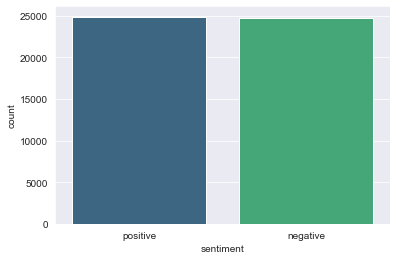

In [2]:
print(sns.countplot(data=movies.sentiment,x=movies.sentiment,palette="viridis"))
print(movies.sentiment.value_counts())

From the last computation it can be gathered that the database is very balanced between positive and negative labels. This is great because it means that it won't be an issue to even things out among the classes we're sorting out. And it is also very ncie to have pre-labeled data as it won't be necessary to develop any algorithm to get more information out of the text.

After very little feature engineering, (which is a fancy way to say we did some computations over the text) we can extract the length of every review and assign it to every review. With this we're able to  tell that most messages' length range from 340 characters to 2301. There are significant outliers to this, but the mean length of the messages is 1310. 

## Sentiment Analysis

Here is a great explanation by Aditya Beri: 

<blockquote> Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

**Why is Sentiment Analysis difficult to perform?**

Though it may seem easy on paper, Sentiment Analysis is a tricky subject. A text may contain multiple sentiments all at once. For instance,

“The acting was good , but the movie could have been better”

The above sentence consists of two polarities!!!

**VADER**

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

**Polarity classification**

We won’t try to determine if a sentence is objective or subjective, fact or opinion. Rather, we care only if the text expresses a positive, negative or neutral opinion.

**Document-level scope**

We’ll also try to aggregate all of the sentences in a document or paragraph, to arrive at an overall opinion.

**Coarse analysis**

We won’t try to perform a fine-grained analysis that would determine the degree of positivity/negativity. That is, we’re not trying to guess how many stars a reviewer awarded, just whether the review was positive or negative. </blockquote>


This is a GREAT article, so be sure to read it and check it for more information on this subject!

So, let's create an instance of the VADER module and see what happens with some of our text:

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("hello pretty ugly one")

{'neg': 0.388, 'neu': 0.235, 'pos': 0.376, 'compound': -0.0258}

In [4]:
sia.polarity_scores("The acting was good , but the movie could have been better")

{'neg': 0.0, 'neu': 0.608, 'pos': 0.392, 'compound': 0.7003}

Next step is to apply the VADER model to the IMDB reviews. Given that the model returns a dictionary I'll use this very nice method to create new labels on our data set directly. This makes a very succint and clean line of code that creates 4 more columns that can be concatenated to our original database. This may be important further on if we want to go deep in our analysis for every review.

In [5]:
scores = movies.review_nopunc.apply(sia.polarity_scores).apply(pd.Series)

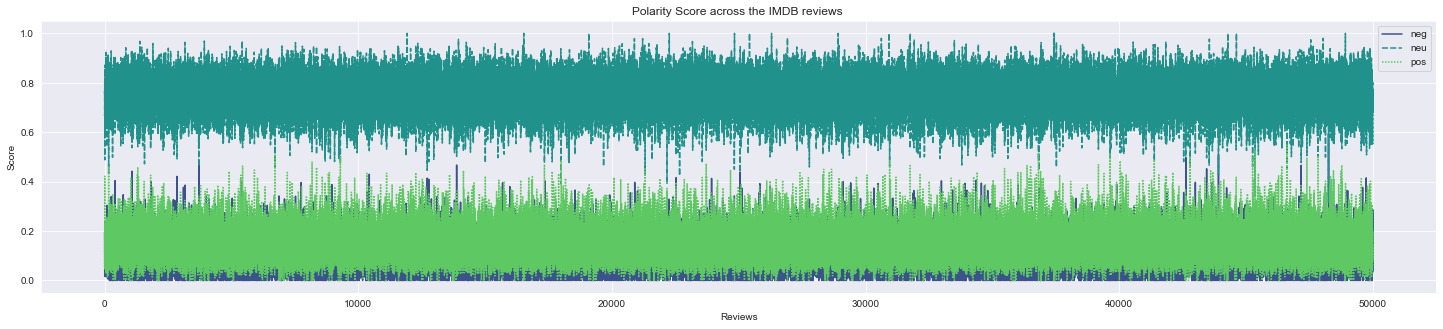

In [6]:
plt.figure(figsize=(25,5))
sns.lineplot(data=[scores.neg,scores.neu,scores.pos],palette="viridis")
plt.title("Polarity Score across the IMDB reviews ")
plt.xlabel("Reviews")
plt.ylabel("Score")
plt.savefig("polarity.png",dpi=800,format="png",transparent=False)
# scores.neg.plot(kind="line")

In [7]:
pd.concat([movies,scores],axis=1)

,review,sentiment,review_nopunc,review_clean,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e...",0.196,0.748,0.056,-0.9947
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...,"[wonderful, little, production, br, br, filmin...",0.052,0.765,0.182,0.9693
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su...",0.106,0.666,0.227,0.9712
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, family, little, boy, jake,...",0.134,0.785,0.081,-0.8858
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, time, money, visually,...",0.052,0.801,0.147,0.9744
...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, right, good, job, wasnt, crea...",0.047,0.753,0.199,0.9890
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...,"[bad, plot, bad, dialogue, bad, acting, idioti...",0.166,0.720,0.114,-0.6693
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho...",0.208,0.683,0.108,-0.9851
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...,"[im, going, disagree, previous, comment, side,...",0.117,0.801,0.081,-0.8657


Everything now is set up to start analyzing different topics over the reviews. More mining and data extraction could be done upon the information we have so far. By associating synonym words to different sentiments, more experimentation could be done to refine what could be infered and extrapolated. 

We can create a data frame that provides information about the words used over the corpus. This will let us know which are the words that potentially could represent possible topics or themes mentioned over a review. For example, these are the 20 most used words and their *Part of Speech* tag over the first 20,000 reviews on the IMDB data set.

In [16]:
# Create an instance of the lemmatizer to be used and create variables which will hold the different lemmatized database.
lemmatizer = WordNetLemmatizer()

bag_of_words = []

for i in range(len(movies["review_clean"][0:25000])):
    for word in movies["review_clean"].iloc[i]:
        word = lemmatizer.lemmatize(word,pos="n")
        bag_of_words.append(word)

most_common = nltk.FreqDist(bag_of_words)
freq_df = pd.DataFrame(most_common.most_common(10001),columns=["word","frequency"])
freq_df["pos_tag"] = freq_df.word.apply(lambda x: nltk.pos_tag([x])[0][1])
freq_df[1:20]

,word,frequency,pos_tag
1,movie,49744,NN
2,film,45045,NN
3,one,26606,CD
4,like,20082,IN
5,time,14646,NN
6,good,14496,JJ
7,character,13776,NN
8,get,12358,VB
9,even,12286,RB
10,would,12163,MD


## Sources

VADER Sentiment Analysis Model

    https://github.com/cjhutto/vaderSentiment

Aditya Beri

    https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664
